# Homework 4 CSCI443 25S

This homework can be done either entirely in Jupyter or in Spark.

This particular homework does not require using Spark.  You may use Pandas.

The distribution of points across the problem is

In [4]:
25+15+35+25

101

## Part 1 Skewness

[25 pts total]

We mostly covered skewness empirically.  "Follow the tails" being a useful
mnemonic--—if the tail extends further to the left, the skewness is negative;
if it extends further to the right, the skewness is positive.

In most cases, a left (negative) skewed distribution is characterized by having
a mean that is less than the median, i.e., the heavy tail on the left has pulled
the mean to the left of the median.  Conversly, a right skewed distribuion is 
characterized by having a mean that is greater than the median.  We will not
encounter any distributions in this class where this is not true.  However, 
the relationship between the mean and median is merely a consequence, it isn't
the formal definition of skewness.  Skewness (\\(\gamma\\)) is most often defined 
as follows

$$\text{Skewness } \gamma = \frac{E[(X-\mu)^3]}{\sigma^3}$$

The sample variance \\(s^2= \frac{1}{n-1}\sum (x_i-\bar{x})^2\\)
uses \\(\frac{1}{n-1}\\) instead of \\(\frac{1}{n}\\) to 
account for sample variance being computed from the same samples
as the sample mean.  

Sample Skewness (\\(G_1\\)) has a somewhat more complicated correction
to handle the bias introduced by computing the sample mean, sample
standard deviation, and sample skewness from the same samples.

$$G_1 = \frac{\sqrt{n(n-1)}}{n-2} \frac{1}{s^3} {\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^3}$$

where

  - \\(n\\) is the number of samples
  - \\(x_i\\) is the \\(i^{th}\\) sample.
  - \\(\bar{x}\\) is the sample mean.

\\(\frac{n}{(n-1)(n-2)}\\) includes the correction for the bias 
introduced by computing \\(\bar{x}\\), \\(s\\), and 
\\(G_1\\) from the same samples.  The derivation of this
correction is outside the scope of the course, but I welcome
the student to study it further should they wish.


**Problem 2** [5 pts] Create code in this notebook to compute the sample skewness.
Do not use the implementation in `scipy.stats`, except if you so desire to check
your answers against an existing implementation.

    def sample_skewness(samples) -> float:
      ...

      # $$\text{Skewness } \gamma = \frac{E[(X-\mu)^3]}{\sigma^3}$$

In [9]:
# ANSWER
import numpy as np
from scipy.stats import skew

def sample_skewness(samples) -> float:
    n = len(samples)
    if n < 3:
        raise ValueError("Must have at least three samples to compute skewness")
        
    mu = np.mean(samples)
    s = np.std(samples, ddof=1)
    cubex = (samples - mu) ** 3
    sumcubex = np.sum(cubex)
    
    # $$G_1 = \frac{\sqrt{n(n-1)}}{n-2} \frac{1}{s^3} {\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^3}$$
    G_1 = (np.sqrt(n * (n-1)) / (n-2)) * (1 / s**3) * (1 / n) * sumcubex

    return G_1

samples = np.array([0, 5, 10])
print(f"sample skewness: {sample_skewness(samples)}")
print(f"scipy skew: {skew(samples, bias=True)}")

sample skewness: 0.0
scipy skew: 0.0


**Problem 3** [5 pts] Using pytest, write three unit tests in this
in this notebook.

The first unit test should confirm that your implementation of sample
skewness returns 0 for samples spread perfectly even across a range.
Your result should be allowed to be within 1e-15 of 0 due to the
limits imposed by floating-point precision.  Use the following to
populate the array

    arr = np.linspace(start=0, stop=10, num=5)
    
All symmetric distributions exhibit 0 skewness. 

Here is an example unit test using Python's built-in unittest module.
The specific unit tests are unrelated to the problem.  The purpose is
just to provide examples of the unittest framework:

    import unittest

    class TestMathOperations(unittest.TestCase):
        def test_addition(self):
            self.assertEqual(1 + 1, 2)

        def test_subtraction(self):
           self.assertEqual(5 - 2, 3)

    unittest.main(argv=[''], exit=False)

Write a second unit test that computes the skewness 

    arr2 = np.append(arr, 1000)

The result should be approximately 1.7885495.

Write a third unit test that confirms that your implementation returns \\(2 \pm 0.05\\)
for a sufficient number of samples drawn from an exponential random variable
with \\(\lambda=1\\).

In [59]:
import unittest
from scipy.stats import skew


class TestSkewness(unittest.TestCase):
    def test_zero_skew(self):
        arr = np.linspace(start=0, stop=10, num=5)

        G1 = sample_skewness(arr)
        self.assertLess(G1, 0.05)
        self.assertGreater(G1, -0.05)
    
    def test_positive_skew(self):
        arr = np.linspace(start=0, stop=10, num=5)
        arr2 = np.append(arr, 1000)
        #print(f"G1={skew(arr2, bias = True)}")
        G1 = sample_skewness(arr2)

        self.assertGreater(G1, 1.788 - 0.1)
        self.assertLess(G1, 1.788 + 0.1)

    def test_negative_skew(self):  # optional. Not in original problem.
        arr = [-100., -20, 0, 1, 2]
        G1 = sample_skewness(arr)
        self.assertLess(G1, 0)

    def test_exponential_skew(self):
        np.random.seed(1231)
        samples = np.random.exponential(scale=1.0, size=100000)
        G1 = sample_skewness(samples)
        self.assertLess(G1, 2.0 + 0.1)
        self.assertGreater(G1, 2.0 - 0.1)
        

unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestSkewness))

....
----------------------------------------------------------------------
Ran 4 tests in 0.009s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

**Probem 4** [5 pts]

Skewness of a distribution is defined as

\\[ \gamma = \frac{E[(X - \mu)^3]}{\sigma^3} = \frac{1}{\sigma^3} \int_{-\infty}^{\infty} (x - \mu)^3 f(x) \, dx \\]

A triangular distribution is defined by three parameters.  It has the pdf

\\[
f(x) = \begin{cases} 
  0      & \text{if } x \leq a \\
  \frac{2\cdot(x-a)}{(b-a)(c-a)}& \text{if } a \leq x \leq c \\
  \frac{2\cdot(c-x)}{(b-a)(c-b)}& \text{if } c \leq x \leq b \\
  0 & \text{if } x \geq b \\
\end{cases}
\\]

where 

 * \\(a\\) is the left corner of the triangle, i.e., the lower bound
   of the distribution's pdf.   
 * \\(b\\) is the right corner of the triangle, i.e., the upper bound
   of the distribution's pdf.
 * \\(c\\) is at the peak of the triangle, i.e., the mode of the
   distribution's pdf.

An example triangular distribution is shown below.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_triangular_distribution(a, b, c):
    """
    Plots a triangular distribution with labels for a, b, and c.
    The peak (c) must be between a and b.
    
    Parameters:
    - a: The minimum value of the distribution
    - b: The maximum value of the distribution
    - c: location of the mode (peak) of the distribution
    """
    assert a <= c <= b 
    
    # Define points for the triangular shape
    x = [a, c, b]
    h = 2 / (b-a)
    w = b-a
    y = [0, h, 0]
    
    # Plotting the triangular distribution
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, '-o', label='Triangular Distribution')
    
    # Annotating points a, b, and c
    plt.text(a - 0.025 * w, 0.05, 'a', ha='center', va='bottom', fontsize=12)
    plt.text(b + 0.025 * w, 0.05, 'b', ha='center', va='bottom', fontsize=12)
    plt.text(c, 1.05 * h, 'c', ha='center', va='bottom', fontsize=12)
    
    # Additional plot settings
    plt.fill_between(x, y, color='skyblue', alpha=0.5)
    plt.xlim([a - 0.1 * (b - a), b + 0.1 * (b - a)])
    plt.ylim([0, h * 1.15])
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.title('Example Triangular Distribution')
    plt.grid(True)
    plt.show()




The mean of a triangular distribution is given by 

\\[ \mu = \frac{a + b + c}{3}\\]

A right triangular distribution with the peak on the right edge of the 
triangle has \\(b=c\\), as shown below.  The triangle is shifted to the 
left so that the mean resides at 0.

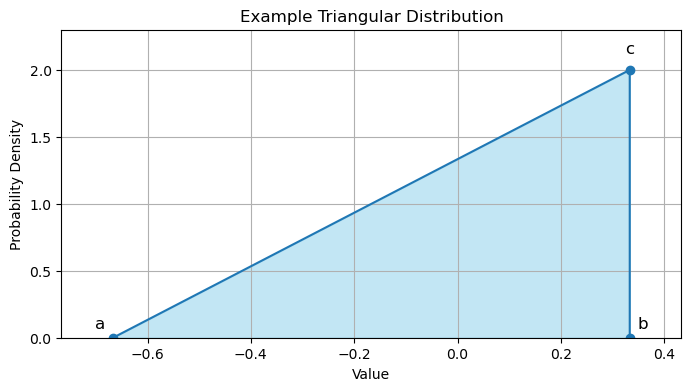

In [3]:
a, b, c = -2/3, 1/3, 1/3 
plot_triangular_distribution(a, b, c)

PDF of a right triangle distribution:

\\[ f(x) = \frac{2(x-a)}{(b-a)^2} \quad \text{for } a \leq x \leq b \\]

However, \\(b-a=1\\), \\(a=-2/3\\), and \\(b=1/3\\) causing the above to simplify

\\[ f(x) = 2(x+\frac{2}{3}) \quad \text{for } -\frac{2}{3} \leq x \leq \frac{1}{3} \\]

Derive the skewness for this distribution.


A: 

\\[ \frac{E[(X - \mu)^3]}{\sigma^3} = \frac{1}{\sigma^3} \int_{-\frac{2}{3}}^{\frac{1}{3}} x^3 \cdot 2(x+\frac{2}{3}) \, dx \\]

$$\frac{1}{\sigma^3} \bigg(\frac{2}{5}x^5 + \frac{1}{3}x^4 \bigg)\bigg|_{x=-\frac{2}{3}}^{\frac{1}{3}}$$

$$\frac{1}{\sigma^3} \bigg(\frac{2}{5}(\frac{1}{3})^5 + \frac{1}{3}(\frac{1}{3})^4 - \frac{2}{5}(-\frac{2}{3})^5 - \frac{1}{3}(-\frac{2}{3})^4 \bigg)$$

$$\gamma = \frac{-0.0\overline{074}}{\sigma^3}$$

The standard deviation of a triangular distribution is given by

\\[ \sigma = \sqrt{\frac{a^2 + b^2 + c^2 - ab - ac - bc}{18}}\\]

Because \\(b==c\\) the standard deviation simplifies to

<!-- \\[ \sigma = \sqrt{\frac{a^2 + b^2 + \cancel{b^2} - ab - ab - \cancel{b^2}}{18}}\\]
-->
\\[ \sigma = \sqrt{\frac{a^2 + b^2 + b^2 - ab - ab - b^2}{18}}\\]

\\[ \sigma = \frac{\sqrt{a^2 - 2ab + b^2}}{3\sqrt{2}} = \frac{|a-b|}{3\sqrt{2}} = \frac{1}{3\sqrt{2}} \\]

\\[ \sigma \approx 0.2357 \\]

\\[ \gamma = (3\sqrt{2})^3 \cdot -0.0\overline{074} \\]

\\[ \boxed{\gamma \approx -0.566} \\]


**Problem 5** [5 pts]

Write code that generates 1000 samples obeying the triangular distribution given in Problem 4.

A: We have a PDF $f(x)$, but it may not be immediately clear how to generate random
numbers that obey this distribution.

One relatively straightforward approach is to 
compute the CDF $F(x)$ which maps $x$ on to the range $[0,1]$.   

$$F(x) = \int_{-\infty}^{x} f(t) dt$$

Then we generate random numbers $y \sim \mathcal{U}[0, 1]$ and map it back to the domain of $x$
using the inverse of the CDR.

$$x = F^{-1}(y)$$

We have 

\\[ f(x) = 2(x+\frac{2}{3}) \quad \text{for } -\frac{2}{3} \leq x \leq \frac{1}{3} \\]

From this we can derive the CDF as follows

\begin{align}
  F(x) &= \int_{-\frac{2}{3}}^x 2(t + \frac{2}{3}) dt \\
       &= \big(2 \frac{t^2}{2} + \frac{4}{3}~t\big) \bigg|_{-\frac{2}{3}}^x \\
       &= t^2 \bigg|_{-\frac{2}{3}}^x + \frac{4}{3}~t \bigg|_{-\frac{2}{3}}^x \\
       &= x^2 - \frac{4}{9} + \frac{4}{3}~x + \frac{8}{9} \\
       \\
  F(x) &= \big( x + \frac{2}{3} \big)^2  \quad \text{for } -\frac{2}{3} \leq x \leq \frac{1}{3} 
\end{align}

We can derive the inverse 

$$x = F^{-1}(y) = \sqrt{y} - \frac{2}{3}$$

We can then compute samples using a uniform random variable $y \sim [0,1]$.


In [62]:
def gen_samples(n):

    return np.sqrt(np.random.uniform(0, 1, size=n)) - 2./3

samples = gen_samples(1000)

-0.5518648348734353

**Problem 6** [5 pts]

Use the samples generated in Problem 5 to demonstrate that the sample skewness is close to the 
analytically derived distribution skewness from Problem 4.

In [63]:
sample_skewness(samples)

-0.5518648348734353

## Part 2 Hypothesis Testing

[15 points total]

**Problem 7**: [3 pts]

What does a significance level of 0.05 mean in hypothesis testing?  
- A) There is a 5% chance that the null hypothesis is true.  
- B) There is a 95% chance that the null hypothesis is false.  
- C) There is a 5% chance of making a Type I error (rejecting a true null hypothesis).  
- D) There is a 5% chance of making a Type II error (failing to reject a false null hypothesis).

**Answer:** C) There is a 5% chance of making a Type I error (rejecting a true null hypothesis).

---

**Problem 8**: [3 pts]

Which of the following is true about the relationship between the significance level (alpha) and the probability of a Type I error?  
- A) As alpha increases, the probability of a Type I error decreases.  
- B) As alpha increases, the probability of a Type I error increases.
- C) As alpha decreases, the probability of a Type I error increases.  
- D) There is no relationship between alpha and the probability of a Type I error.

**Answer:** B) As alpha increases, the probability of a Type I error increases.

---

**Problem 9**: [3 pts]

If a hypothesis test results in a p-value of 0.03 and the chosen significance level is 0.05, what should the researcher conclude?  
- A) Reject the null hypothesis, as the p-value is greater than the significance level.  
- B) Fail to reject the null hypothesis, as the p-value is greater than the significance level.  
- C) Reject the null hypothesis, as the p-value is less than the significance level.  
- D) Fail to reject the null hypothesis, as the p-value is less than the significance level.

**Answer:** C) Reject the null hypothesis, as the p-value is less than the significance level.

---

**Problem 10**: [3 pts]

What happens when the significance level (alpha) is set too high in a hypothesis test?  
- A) The likelihood of committing a Type II (false negative) error increases.  
- B) The likelihood of committing a Type I (false positive) error decreases.  
- C) The test becomes too stringent, making it harder to reject the null hypothesis.  
- D) The likelihood of committing a Type I (false positive) error increases.

**Answer:** D) The likelihood of committing a Type I error increases.

---

**Problem 11**: [3 pts]

Which of the following is true about the p-value in relation to the significance level?  
- A) A p-value greater than the significance level suggests that the null hypothesis should be rejected.  
- B) A p-value smaller than the significance level suggests that the null hypothesis cannot be rejected.  
- C) A p-value smaller than the significance level suggests that the null hypothesis should be rejected.  
- D) The p-value is irrelevant to hypothesis testing and significance level.

**Answer:** C) A p-value smaller than the significance level suggests that the null hypothesis should be rejected.

## Part 3 Pancakes, Eggs, and Table Heights in the Academy of Lagado

[35 points total]

**The Great Breakfast Debate**

During your visit to the flying island of Laputa, you find yourself at the Academy of Lagado— an institution known for its relentless pursuit of impractical science.  Two professors — Professor Eggsworth and Professor Flapjack — are engaged in a heated scientific rivalry.

Each claims to have discovered the secret to determining the ideal breakfast table height for a citizen of Lagado.
  * Professor Eggsworth believes that egg consumption per person predicts optimal table height.
  * Professor Flapjack insists it’s actually the number of pancakes consumed per person that determines how high a Lagadian table should be.

Each professor has gathered data across one hundred households, measuring the average daily consumption of eggs and pancakes, along with the Academy’s recommended breakfast table height (measured in Lagadian cubits).

Their calculating department chair recognizing the danger of standing in the crossfire turns to you, a sacrificable data scientist from Ole Miss, to settle the debate.

**Your Mission**

You are given a dataset `lagado_breakfast_data.csv` with the following columns:
  * eggs_per_person
  * pancakes_per_person
  * ideal_table_height

Your task is to determine:
  1. Which professor’s theory is statistically supported, if either.
  2. Whether the professors should be given tenure or permanently reassigned to the marble pillow division.

**Problem 12** [5 pts] Load and visualize the dataset using matplotlib. Create two scatterplots using matplotlib:
 * One of eggs_per_person vs ideal_table_height
 * One of pancakes_per_person vs ideal_table_height
 
Describe any visible trends.

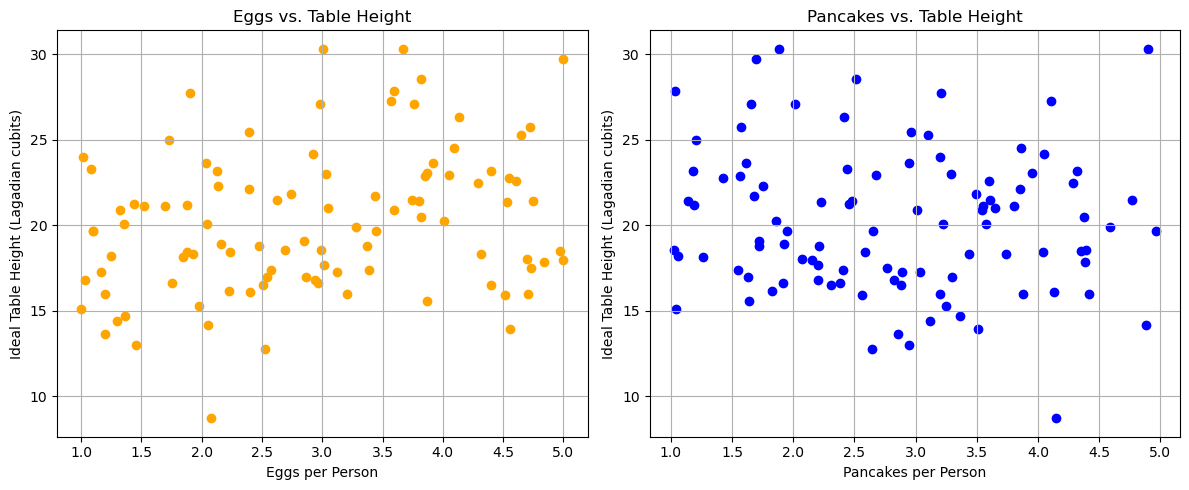

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('lagado_breakfast_data.csv')   # assumes dataA.csv is in the current directory

fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # adjust figsize as needed

# First plot: Eggs vs Table Height
axs[0].scatter(df["eggs_per_person"], df["ideal_table_height"], color="orange")
axs[0].set_xlabel("Eggs per Person")
axs[0].set_ylabel("Ideal Table Height (Lagadian cubits)")
axs[0].set_title("Eggs vs. Table Height")
axs[0].grid(True)

# Second plot: Pancakes vs Table Height
axs[1].scatter(df["pancakes_per_person"], df["ideal_table_height"], color="blue")
axs[1].set_xlabel("Pancakes per Person")
axs[1].set_ylabel("Ideal Table Height (Lagadian cubits)")
axs[1].set_title("Pancakes vs. Table Height")
axs[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**Trends:**

It is difficult to see any trends in either of these plots.  There is significantly variability.
Although it may be that ideal table height goes up slightly with the number of eggs
consumed per person and down with the number of pancakes. I would defer saying anything 
definitive until we perform a significance test on the correlation.

**Problem 13** [5 pts] For the eggs test and then the pancakes test:

  * State the null and alternative hypotheses for the case where we only want to know whether there is correlation (two-tailed)

**Answer**: A reasonable answer is below.  Wording can vary so long as the hypotheses carry the same meaning.

$$H_{0e}: \textrm{Eggs per person is uncorrelated with ideal table height}$$
$$H_{ae}: \textrm{Eggs per person is correlated (non-zero) with ideal table height}$$

$$H_{0p}: \textrm{Pancakes per person is uncorrelated with ideal table height}$$
$$H_{ap}: \textrm{Pancakes per person is correlated (non-zero) with ideal table height}$$

**Problem 14** [5 pts] Compute the Pearson correlation coefficient and associated p-value for each relationship:
 * Eggs vs Table Height
 * Pancakes vs Table Height
Report both r-values and p-values.

In [67]:
import pandas as pd
from scipy import stats


# Compute Pearson correlation and p-value
r_value, p_value = stats.pearsonr(df["eggs_per_person"], df["ideal_table_height"])

# Display the results clearly
print("* Eggs test:")
print(f"Pearson correlation coefficient (r): {r_value:.3f}")
print(f"P-value: {p_value:.9f}")

r_value, p_value = stats.pearsonr(df["pancakes_per_person"], df["ideal_table_height"])

print("\n* Pancakes test:")
print(f"Pearson correlation coefficient (r): {r_value:.3f}")
print(f"P-value: {p_value:.9f}")


* Eggs test:
Pearson correlation coefficient (r): 0.264
P-value: 0.008023854

* Pancakes test:
Pearson correlation coefficient (r): -0.093
P-value: 0.355513813


**Problem 15** [5 pts] Determine whether the results are statistically significant at the α = 0.01 level.
 * Interpret the result in plain language. (Which professor, if any, is right?)

**Answer** The egg test is statistically significant (p=0.008 < 0.01), we can reject the null hypothesis that "Eggs per person is uncorrelated with ideal table height."  This only says that there is statistically signifcant support for the altenative hypothesis, but it does not say anything about whether the data is positive or negatively correlated, since we are performing a two-tailed test.

For the pancake test, there is insufficient evidence to reject the null hypothesis, because the p-value (0.356) exceeds the confidence level α = 0.01.   This means that based on the data, we cannot conclude that there is a statistically significant correlation between pancakes per person and ideal table height. Note that failing to reject the null does not prove the absence of a correlation; it simply means that the evidence is not strong enough to support a correlation.

Based on these results, only Professor Eggsworth’s theory about egg consumption appears to be statistically supported, while Professor Flapjack’s theory about pancake consumption is not supported by the evidence.

**Problem 16** [5 pts] Restate the null and alternative hypotheses for the egg test and then the pancake test for the case where we are trying to determine whether there is statistically significant evidence of a positive correlation (one-tailed).  

Explain the difference between one and two tailed tests.

**Answer**: A reasonable answer is below.  Wording can vary so long as the hypotheses carry the same meaning.

$$H_{0e}: \textrm{Eggs per person is negatively correlated (r<0) or uncorrelated (r=0) with ideal table height}$$
$$H_{ae}: \textrm{Eggs per person is positively correlated (r>0) with ideal table height}$$

$$H_{0p}: \textrm{Pancakes per person is negatively correlated (r<0) or uncorrelated (r=0) with ideal table height}$$
$$H_{ap}: \textrm{Pancakes per person is positively correlated (r>0) with ideal table height}$$

These hypotheses correspond to a one-tailed test. Here, we test whether there is sufficient evidence to reject the null hypothesis—which includes the possibility of a negative or no correlation—in favor of the alternative that the correlation is positive. In contrast, with a two-tailed test the null hypothesis would typically state that the correlation is zero (r = 0), and the alternative would cover both extremes (r ≠ 0), thereby considering the possibility of both positive and negative correlations.

**Problem 17** [5 pts] Compute the associated p-values for the given data under the given null hypotheses from Problem 16:
 * Eggs vs Table Height
 * Pancakes vs Table Height
Report both p-values.

In [68]:
from scipy import stats

def positive_pearsonr(x, y):
    r_value, p_value = stats.pearsonr(x, y)

    # For a one-tailed test (alternative: r > 0)
    if r_value > 0:
        p_value /= 2
    else:
        # If the correlation is negative, the one-tailed test does not support the alternative hypothesis.
        p_value = 1 - p_value / 2
    return r_value, p_value
    
r_value, p_value = positive_pearsonr(df["eggs_per_person"], df["ideal_table_height"])

print("* Egg test (one-tailed):")
print(" p-value:", p_value)

r_value, p_value = positive_pearsonr(df["pancakes_per_person"], df["ideal_table_height"])

print("* Pancakes test (one-tailed for positive r):")
print(" p-value:", p_value)


* Egg test (one-tailed):
 p-value: 0.004011927142496346
* Pancakes test (one-tailed for positive r):
 p-value: 0.8222430934869007


**Problem 18** [5 pts] Determine whether the tests described in Problem 16 and computed in Problem 17 are statistically significant at the α = 0.01 level.
 * Interpret the result in plain language.

**Answer** For the correlation of eggs per person vs. ideal table height, the p-value of 
0.0040 is less than α = 0.01.  It thus indicates that there is sufficient evidence to 
reject the null hypothesis, which also indicates that the evidence of a positive correlation is
significant.

For the correlation of pancakes per person vs. ideal table height, the p-value is 0.822, which
is greater than α = 0.01, indicating there is insufficient evidence to reject the null
hypothesis of a zero or negative correlation.

**Problem 19** [Bonus: 5 pts] The Lagadian government is considering funding a research grant to produce adjustable-height tables based on breakfast habits. Would you recommend this investment based on the evidence obtained so far? Support your recommendation with humor and statistics.

**Answer** To avoid getting caught in the crossfire, my response would be evasive.
I'd point out that there is significant variability in the ideal table height, which
alone justifies funding a research grant to produce adjustable-height tables.

If I am pressed to verify the significance of the findings then I stand behind the
department chair guaranteeing that he is in the crossfire should things go badly then 
I speak really slowly to afford the chair ample opportunity to cancel the meeting.
If he moves, I happily follow so as to keep him in the middle.

If this does not work then I lie and say that both correlations are significant,
and that this justifies funding a research grant even though only the number of eggs
vs table height exhibits a statistically significant correlation with an α = 0.01.

In all three cases, I'd depart Lagado as quickly as possible.

## Part 4. A Lilliputian Statistical Crisis

[25 pts total]

For centuries, the proud nation of Lilliput has enforced the imperial edict that boiled eggs must be opened at the small end — a decree that led to the exile of the rebellious Big-Endians to the neighboring island of Blefuscu. This seemingly trivial matter has caused six rebellions, countless beheadings, and at least one naval war.

Recently, the Ministry of Tradition commissioned a poll to reinforce the cultural superiority of the Little-End way. Citizens of Lilliput and Blefuscu were asked privately which end they preferred to crack their eggs. The results shocked the establishment:
  * 52 out of 100 Lilliputians said they preferred the big end.
  * 36 out of 80 Blefuscudians said they preferred the big end.

Panic ensued. The High Chamber of Truthiness demanded a rigorous statistical analysis before launching another inquisition or rewriting the sacred breakfast scriptures.

**Your Mission:**

* Restore Order (or Confirm Chaos)

* Protect your head.

**Problem 20**. [5 pts] State the null hypothesis and alternative hypothesis to test whether the two populations (Lilliput and Blefuscu) significantly differ in their proportions of big-end preference.

**Answer**

$$H_{0}: \textrm{The proportion of Lilliputians who prefer the big end is equal to the proportion of Blefuscidians who prefer the big end.}$$

$$H_{a}: \textrm{The proportion of Lilliputians who prefer the big end is not equal to the proportion of Blefuscudians who prefer the big end.}$$

**Problem 21**. [5 pts] Calculate the sample proportions for each group. Which group appears to be more big-endian? Which group is supposed to be?

**Answer**

The sample proportion is the ratio between the number preferring the big end
and the number of samples.

The sample proportion of Lilliputians who prefer the big end is

$$52/100 = 0.52$$

The sample proportion of Blefuscudians who prefer the big end is

$$36/80 = 0.45$$

The Lilliputians appear to be more "big-endian" from the given
sample proportions.  However, the Lilliputian government expects
that Blefuscudians should be more "big-endian."  I infer that
the sacred breakfast scriptures indicate that the Lilliputians
should prefer opening boiled eggs from the little end, and that
the Blefuscudians should prefer the morally inferior big end.


**Problem 22**. [5 pts] Under the null hypothesis stated in Problem 20, calculate the pooled estimate of the proportion and the standard error. 

**Answer**


Let $x_L$ denote the number of Lilliputians that prefer the big end.

Let $x_B$ denote the number of Blefuscudians that prefer the big end.

Let $n_L$ be the total number of Lilliputians polled.

Let $n_B$ be the total number of Blefuscudians polled.

If the null hypothesis is true then it is valid to consider all samples
were drawn from the same distribution.   If so we can "pool" the
samples.

Let $\hat{p}$ denote the pooled estimate of the sample proportion.

The pooled estimate treats all samples as if they came from the same distribution

$$
\hat{p} = \frac{x_L + x_B}{n_L + n_B} = \frac{52+36}{80 + 100} = 0.4\overline{8}
$$

The standard error of the sample proportion of a binomial random variable is given by

$$\text{SE}(\hat{p}) = \sqrt{\frac{p(1-p)}{n}}$$

When we assume that the sample are drawn from the same distribution, we pool
the samples 

$$\text{SE}(\hat{p}) = \sqrt{\hat{p}(1-\hat{p})\bigg(\frac{1}{n_L} + \frac{1}{n_B}\bigg)}$$


$$\text{SE}(\hat{p}) = \sqrt{0.4\overline{8} (1-0.4\overline{8})\bigg(\frac{1}{100} + \frac{1}{80}\bigg)}$$

$$\text{SE}(\hat{p}) = \sqrt{0.4\overline{8} (1-0.4\overline{8}) 0.0225}$$

**Problem 23** [5 pts] Assume that the sampling distribution of the sample
proportion is reasonably approximated by a normal (Gaussian) distribution.
Then compute the z-score and corresponding p-value for the difference in sample
proportions.

In [69]:
from math import sqrt
SE = sqrt(0.4888888 * (1-0.48888888) * 0.0225)
SE

0.07498147303019433

Let $D$ denote the difference between the sample proportions for Lilliputions $p_L$ and
Blefuscudians $p_B$.  

The Z-score of a sample of the sample proportion $D$ is thus given by

$$Z_D = \frac{D - \mu_D}{s_D}$$

Under the null hypothesis, the two sample proportions are equal
and thus $\mu_D = 0$ which simplifies the Z-score to

$$Z_D = \frac{D}{s_D} = \frac{p_L - p_B}{s_D}$$

The standard deviation of the sampling distribution of the sample proportion is the standard 
error of $\hat{p}$.  Thus the above equation becomes

$$Z_D = \frac{p_L - p_B}{\text{SE}(\hat{p})} \approx \frac{0.52 - 0.45}{0.07498147}$$

In [72]:
from IPython.display import Markdown, display

Z_D = (0.52-0.45) / SE
display(Markdown(f"$Z_D$ = {Z_D}"))


$Z_D$ = 0.93356394814772

Let $\Phi$ denote the CDF of the Gaussian distribution.
In a null hypothesis test, the p-value is the probability of an outcome that
is equal to or more extreme than the observed outcome $Z_D$.

Thus the p-value is given by

$$P[D >Z_D \mathrm{~or~} P < -Z_D] = 2(1 - P[D < Z_D]) = 2(1-\Phi(Z_D))$$

In [71]:
from scipy.stats import norm

phi = norm.cdf(Z_D)
p = 2*(1-phi)
print(f"p-value = {p}")


p-value = 0.3505288693751347


**Problem 24**. [5 pts] At a 5% significance level, can the High Chamber reject the null hypothesis and declare a statistically meaningful betrayal of Lilliputian values? Justify your answer.

**Answer** No.  The evidence is insufficient to reject the null hypothesis because the p-value $\approx 0.35$ 
is greater than the signficance level $\alpha = 0.05$.